You can order print and ebook versions of *Think Python 3e* from
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) and
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

(chapter_search)=
# Iteration and Search

In 1939 Ernest Vincent Wright published a 50,000 word novel called *Gadsby* that does not contain the letter "e". Since "e" is the most common letter in English, writing even a few words without using it is difficult.
To get a sense of how difficult, in this chapter we'll compute the fraction of English words have at least one "e".

For that, we'll use `for` statements to loop through the letters in a string and the words in a file, and we'll update variables in a loop to count the number of words that contain an "e".
We'll use the `in` operator to check whether a letter appears in a word, and you'll learn a programming pattern called a "linear search".

As an exercise, you'll use these tools to solve a word puzzle called "Spelling Bee".

## Loops and strings

In Chapter 3 we saw a `for` loop that uses the `range` function to display a sequence of numbers.

In [3]:
for i in range(3):
    print(i, end=' ')

0 1 2 

This version uses the keyword argument `end` so the `print` function puts a space after each number rather than a newline.

We can also use a `for` loop to display the letters in a string.

In [4]:
for letter in 'Gadsby':
    print(letter, end=' ')

G a d s b y 

Notice that I changed the name of the variable from `i` to `letter`, which provides more information about the value it refers to.
The variable defined in a `for` loop is called the **loop variable**.

Now that we can loop through the letters in a word, we can check whether it contains the letter "e".

In [5]:
for letter in "Gadsby":
    if letter == 'E' or letter == 'e':
        print('This word has an "e"')

Before we go on, let's encapsulate that loop in a function.

In [6]:
def has_e():
    for letter in "Gadsby":
        if letter == 'E' or letter == 'e':
            print('This word has an "e"')

And let's make it a pure function that return `True` if the word contains an "e" and `False` otherwise.

In [7]:
def has_e():
    for letter in "Gadsby":
        if letter == 'E' or letter == 'e':
            return True
    return False

We can generalize it to take the word as a parameter.

In [8]:
def has_e(word):
    for letter in word:
        if letter == 'E' or letter == 'e':
            return True
    return False

Now we can test it like this:

In [9]:
has_e('Gadsby')

False

In [10]:
has_e('Emma')

True

## Reading the word list

To see how many words contain an "e", we'll need a word list.
The one we'll use is a list of about 114,000 official crosswords; that is, words that are considered valid in crossword puzzles and other word games. 

The following cell downloads the word list, which is a modified version of a list collected and contributed to the public domain by Grady Ward as part of the Moby lexicon project (see <http://wikipedia.org/wiki/Moby_Project>).

In [11]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

The word list is in a file called `words.txt`, which is downloaded in the notebook for this chapter.
To read it, we'll use the built-in function `open`, which takes the name of the file as a parameter and returns a **file object** we can use to read the file.

In [12]:
file_object = open('words.txt')

The file object provides a function called `readline`, which reads characters from the file until it gets to a newline and returns the result as a string:

In [13]:
file_object.readline()

'aa\n'

Notice that the syntax for calling `readline` is different from functions we've seen so far. That's because it is a **method**, which is a function associated with an object.
In this case `readline` is associated with the file object, so we call it using the name of the object, the dot operator, and the name of the method.

The first word in the list is "aa", which is a kind of lava.
The sequence `\n` represents the newline character that separates this word from the next.

The file object keeps track of where it is in the file, so if you call
`readline` again, you get the next word:

In [14]:
line = file_object.readline()
line

'aah\n'

To remove the newline from the end of the word, we can use `strip`, which is a method associated with strings, so we can call it like this.

In [15]:
word = line.strip()
word

'aah'

`strip` removes whitespace characters -- including spaces, tabs, and newlines -- from the beginning and end of the string.

You can also use a file object as part of a `for` loop. 
This program reads `words.txt` and prints each word, one per line:

In [16]:
for line in open('words.txt'):
    word = line.strip()
    print(word)

aa
aah
aahed
aahing
aahs
aal
aalii
aaliis
aals
aardvark
aardvarks
aardwolf
aardwolves
aas
aasvogel
aasvogels
aba
abaca
abacas
abaci
aback
abacus
abacuses
abaft
abaka
abakas
abalone
abalones
abamp
abampere
abamperes
abamps
abandon
abandoned
abandoning
abandonment
abandonments
abandons
abas
abase
abased
abasedly
abasement
abasements
abaser
abasers
abases
abash
abashed
abashes
abashing
abasing
abatable
abate
abated
abatement
abatements
abater
abaters
abates
abating
abatis
abatises
abator
abators
abattis
abattises
abattoir
abattoirs
abaxial
abaxile
abbacies
abbacy
abbatial
abbe
abbes
abbess
abbesses
abbey
abbeys
abbot
abbotcies
abbotcy
abbots
abbreviate
abbreviated
abbreviates
abbreviating
abbreviation
abbreviations
abdicate
abdicated
abdicates
abdicating
abdication
abdications
abdomen
abdomens
abdomina
abdominal
abdominally
abduce
abduced
abducens
abducent
abducentes
abduces
abducing
abduct
abducted
abducting
abductor
abductores
abductors
abducts
abeam
abed
abele
abeles
abelmosk
abelmosks

probably
proband
probands
probang
probangs
probate
probated
probates
probating
probation
probationary
probationer
probationers
probations
probe
probed
prober
probers
probes
probing
probit
probities
probits
probity
problem
problematic
problematical
problems
proboscides
proboscis
procaine
procaines
procarp
procarps
procedure
procedures
proceed
proceeded
proceeding
proceedings
proceeds
process
processed
processes
processing
procession
processional
processionals
processions
processor
processors
prochain
prochein
proclaim
proclaimed
proclaiming
proclaims
proclamation
proclamations
proclivities
proclivity
procrastinate
procrastinated
procrastinates
procrastinating
procrastination
procrastinations
procrastinator
procrastinators
procreate
procreated
procreates
procreating
procreation
procreations
procreative
procreator
procreators
proctor
proctored
proctorial
proctoring
proctors
procurable
procural
procurals
procure
procured
procurement
procurements
procurer
procurers
procures
procuring
prod
p

shelfful
shelffuls
shell
shellac
shellack
shellacked
shellacking
shellackings
shellacks
shellacs
shelled
sheller
shellers
shellfish
shellfishes
shellier
shelliest
shelling
shells
shelly
shelter
sheltered
sheltering
shelters
sheltie
shelties
shelty
shelve
shelved
shelver
shelvers
shelves
shelvier
shelviest
shelving
shelvings
shelvy
shenanigans
shend
shending
shends
shent
sheol
sheols
shepherd
shepherded
shepherdess
shepherdesses
shepherding
shepherds
sherbert
sherberts
sherbet
sherbets
sherd
sherds
shereef
shereefs
sherif
sheriff
sheriffs
sherifs
sherlock
sherlocks
sheroot
sheroots
sherries
sherris
sherrises
sherry
shes
shetland
shetlands
sheuch
sheuchs
sheugh
sheughs
shew
shewed
shewer
shewers
shewing
shewn
shews
shh
shibah
shibahs
shicksa
shicksas
shied
shiel
shield
shielded
shielder
shielders
shielding
shields
shieling
shielings
shiels
shier
shiers
shies
shiest
shift
shifted
shifter
shifters
shiftier
shiftiest
shiftily
shifting
shiftless
shiftlessness
shiftlessnesses
shifts
shifty
sh

Now that we can read the word list, the next step is to count them.
For that, we will need the ability to update variables.

## Updating variables

As you may have discovered, it is legal to make more than one assignment
to the same variable.
A new assignment makes an existing variable refer to a new value (and stop referring to the old value).

For example, here is an initial assignment that creates a variable.

In [17]:
x = 5
x

5

And here is an assignment that changes the value of a variable.

In [18]:
x = 7
x

7

The following figure shows what these assignments looks like in a state diagram.

In [19]:
from diagram import make_rebind, draw_bindings

bindings = make_rebind('x', [5, 7])

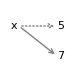

In [20]:
from diagram import diagram, adjust

width, height, x, y = [0.54, 0.61, 0.07, 0.45]
ax = diagram(width, height)
bbox = draw_bindings(bindings, ax, x, y)
# adjust(x, y, bbox)

The dotted arrow indicates that `x` no longer refers to `5`.
The solid arrow indicates that it now refers to `7`.

A common kind of assignment is an **update**, where the new value of
the variable depends on the old.

In [21]:
x = 7

In [22]:
x = x + 1
x

8

This statement means "get the current value of `x`, add one, and assign the result back to `x`."

If you try to update a variable that doesn't exist, you get an error, because Python evaluates the expression on the right before it assigns a value to the variable on the left.

In [23]:

y = y + 1

Before you can update a variable, you have to **initialize** it, usually
with a simple assignment:

In [24]:
y = 0
y = y + 1
y

1

Increasing the value of a variable is called an **increment**; decreasing the value is called a **decrement**.
Because these operations are so common, Python provides **augmented assignment operators** that update a variable more concisely.
For example, the `+=` operator increments a variable by the given amount.

In [25]:
y += 2
y

3

There are augmented assignment operators for the other arithmetic operators, including `-=` and `*=`.

## Looping and counting

The following program counts the number of words in the word list.

In [26]:
total = 0

for line in open('words.txt'):
    word = line.strip()
    total += 1

It starts by initializing `total` to `0`.
Each time through the loop, it increments `total` by `1`.
So when the loop exits, `total` refers to the total number of words.

In [27]:
total

113783

A variable like this, used to count the number of times something happens, is called a **counter**.

We can add a second counter to the program to keep track of the number of words that contain an "e".

In [28]:
total = 0
count = 0

for line in open('words.txt'):
    word = line.strip()
    total = total + 1
    if has_e(word):
        count += 1

Let's see how many words contain an "e".

In [29]:
count

76162

As a percentage of `total`, about two-thirds of the words use the letter "e".

In [30]:
count / total * 100

66.93618554617122

So you can understand why it's difficult to craft a book without using any such words.

## The in operator

The version of `has_e` we wrote in this chapter is more complicated than it needs to be.
Python provides an operator, `in`,  that checks whether a character appears in a string.

In [31]:
word = 'Gadsby'
'e' in word

False

So we can rewrite `has_e` like this.

In [32]:
def has_e(word):
    if 'E' in word or 'e' in word:
        return True
    else:
        return False

And because the conditional of the `if` statement has a boolean value, we can eliminate the `if` statement and return the boolean directly.

In [33]:
def has_e(word):
    return 'E' in word or 'e' in word

We can simplify this function even more using the method `lower`, which converts the letters in a string to lowercase.
Here's an example.

In [34]:
word.lower()

'gadsby'

`lower` makes a new string -- it does not modify the existing string -- so the value of `word` is unchanged. 

In [35]:
word

'Gadsby'

Here's how we can use `lower` in `has_e`.

In [36]:
def has_e(word):
    return 'e' in word.lower()

In [37]:
has_e('Gadsby')

False

In [38]:
has_e('Emma')

True

## Search

Based on this simpler version of `has_e`, let's write a more general function called `uses_any` that takes a second parameter that is a string of letters.
If returns `True` if the word uses any of the letters and `False` otherwise.

In [39]:
def uses_any(word, letters):
    for letter in word.lower():
        if letter in letters.lower():
            return True
    return False

Here's an example where the result is `True`.

In [40]:
uses_any('banana', 'aeiou')

True

And another where it is `False`.

In [41]:
uses_any('apple', 'xyz')

False

`uses_only` converts `word` and `letters` to lowercase, so it works with any combination of cases. 

In [42]:
uses_any('Banana', 'AEIOU')

True

The structure of `uses_any` is similar to `has_e`.
It loops through the letters in `word` and checks them one at a time.
If it finds one that appears in `letters`, it returns `True` immediately.
If it gets all the way through the loop without finding any, it returns `False`.

This pattern is called a **linear search**.
In the exercises at the end of this chapter, you'll write more functions that use this pattern.

## Doctest

In [Chapter 4](section_docstring) we used a docstring to document a function -- that is, to explain what it does.
It is also possible to use a docstring to *test* a function.
Here's a version of `uses_any` with a docstring that includes tests.

In [43]:
def uses_any(word, letters):
    """Checks if a word uses any of a list of letters.
    
    >>> uses_any('banana', 'aeiou')
    True
    >>> uses_any('apple', 'xyz')
    False
    """
    for letter in word.lower():
        if letter in letters.lower():
            return True
    return False

Each test begins with `>>>`, which is used as a prompt in some Python environments to indicate where the user can type code.
In a doctest, the prompt is followed by an expression, usually a function call.
The following line indicates the value the expression should have if the function works correctly.

In the first example, `'banana'` uses `'a'`, so the result should be `True`.
In the second example, `'apple'` does not use any of `'xyz'`, so the result should be `False`.

To run these tests, we have to import the `doctest` module and run a function called `run_docstring_examples`.
To make this function easier to use, I wrote the following function, which takes a function object as an argument.

In [44]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

We haven't learned about `globals` and `__name__` yet -- you can ignore them.
Now we can test `uses_any` like this.

In [45]:
run_doctests(uses_any)

`run_doctests` finds the expressions in the docstring and evaluates them.
If the result is the expected value, the test **passes**.
Otherwise it **fails**.

If all tests pass, `run_doctests` displays no output -- in that case, no news is good news.
To see what happens when a test fails, here's an incorrect version of `uses_any`.

In [46]:
def uses_any_incorrect(word, letters):
    """Checks if a word uses any of a list of letters.
    
    >>> uses_any_incorrect('banana', 'aeiou')
    True
    >>> uses_any_incorrect('apple', 'xyz')
    False
    """
    for letter in word.lower():
        if letter in letters.lower():
            return True
        else:
            return False     # INCORRECT!

And here's what happens when we test it.

In [47]:
run_doctests(uses_any_incorrect)

**********************************************************************
File "__main__", line 4, in uses_any_incorrect
Failed example:
    uses_any_incorrect('banana', 'aeiou')
Expected:
    True
Got:
    False


The output includes the example that failed, the value the function was expected to produce, and the value the function actually produced.

If you are not sure why this test failed, you'll have a chance to debug it as an exercise.

## Glossary

**loop variable:**
A variable defined in the header of a `for` loop.

**file object:**
An object that represents an open file and keeps track of which parts of the file have been read or written.

**method:**
 A function that is associated with an object and called using the dot operator.

**update:**
An assignment statement that give a new value to a variable that already exists, rather than creating a new variables.

**initialize:**
Create a new variable and give it a value.

**increment:**
Increase the value of a variable.

**decrement:**
Decrease the value of a variable.

**counter:**
 A variable used to count something, usually initialized to zero and then incremented.

**linear search:**
A computational pattern that searches through a sequence of elements and stops what it finds what it is looking for.

**pass:**
If a test runs and the result is as expected, the test passes.

**fail:**
If a test runs and the result is not as expected, the test fails.

## Exercises

In [ ]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

### Ask a virtual assistant

In `uses_any`, you might have noticed that the first `return` statement is inside the loop and the second is outside.

In [48]:
def uses_any(word, letters):
    for letter in word.lower():
        if letter in letters.lower():
            return True
    return False

When people first write functions like this, it is a common error to put both `return` statements inside the loop, like this.

In [49]:
def uses_any_incorrect(word, letters):
    for letter in word.lower():
        if letter in letters.lower():
            return True
        else:
            return False     # INCORRECT!

Ask a virtual assistant what's wrong with this version.

### Exercise

Write a function named `uses_none` that takes a word and a string of forbidden letters, and returns `True` if the word does not use any of the forbidden letters.

Here's an outline of the function that includes two doctests.
Fill in the function so it passes these tests, and add at least one more doctest.

In [50]:
def uses_none(word, forbidden):
    """Checks whether a word avoid forbidden letters.
    
    >>> uses_none('banana', 'xyz')
    True
    >>> uses_none('apple', 'efg')
    False
    """
    return None

In [52]:
run_doctests(uses_none)

### Exercise

Write a function called `uses_only` that takes a word and a string of letters, and that returns `True` if the word contains only letters in the string.

Here's an outline of the function that includes two doctests.
Fill in the function so it passes these tests, and add at least one more doctest.

In [53]:
def uses_only(word, available):
    """Checks whether a word uses only the available letters.
    
    >>> uses_only('banana', 'ban')
    True
    >>> uses_only('apple', 'apl')
    False
    """
    return None

In [55]:
run_doctests(uses_only)

### Exercise

Write a function called `uses_all` that takes a word and a string of letters, and that returns `True` if the word contains all of the letters in the string at least once.

Here's an outline of the function that includes two doctests.
Fill in the function so it passes these tests, and add at least one more doctest.

In [56]:
def uses_all(word, required):
    """Checks whether a word uses all required letters.
    
    >>> uses_all('banana', 'ban')
    True
    >>> uses_all('apple', 'api')
    False
    """
    return None

In [58]:
run_doctests(uses_all)

### Exercise

*The New York Times* publishes a daily puzzle called "Spelling Bee" that challenges readers to spell as many words as possible using only seven letters, where one of the letters is required.
The words must have at least four letters.

For example, on the day I wrote this, the letters were `ACDLORT`, with `R` as the required letter.
So "color" is an acceptable word, but "told" is not, because it does not use `R`, and "rat" is not because it has only three letters.
Letters can be repeated, so "ratatat" is acceptable.

Write a function called `check_word` that checks whether a given word is acceptable.
It should take as parameters the word to check, a string of seven available letters, and a string containing the single required letter.
You can use the functions you wrote in previous exercises.

Here's an outline of the function that includes doctests.
Fill in the function and then check that all tests pass.

In [59]:
def check_word(word, available, required):
    """Check whether a word is acceptable.
    
    >>> check_word('color', 'ACDLORT', 'R')
    True
    >>> check_word('ratatat', 'ACDLORT', 'R')
    True
    >>> check_word('rat', 'ACDLORT', 'R')
    False
    >>> check_word('told', 'ACDLORT', 'R')
    False
    >>> check_word('bee', 'ACDLORT', 'R')
    False
    """
    return False

In [61]:
run_doctests(check_word)

According to the "Spelling Bee" rules,

* Four-letter words are worth 1 point each.

* Longer words earn 1 point per letter.

* Each puzzle includes at least one "pangram" which uses every letter. These are worth 7 extra points!

Write a function called `score_word` that takes a word and a string of available letters and returns its score.
You can assume that the word is acceptable.

Again, here's an outline of the function with doctests.

In [62]:
def word_score(word, available):
    """Compute the score for an acceptable word.
    
    >>> word_score('card', 'ACDLORT')
    1
    >>> word_score('color', 'ACDLORT')
    5
    >>> word_score('cartload', 'ACDLORT')
    15
    """
    return 0

In [64]:
run_doctests(word_score)

When all of your functions pass their tests, use the following loop to search the word list for acceptable words and add up their scores.

In [65]:
available = 'ACDLORT'
required = 'R'
total = 0

file_object = open('words.txt')
for line in file_object:
    word = line.strip()    
    if check_word(word, available, required):
        score = word_score(word, available)
        total = total + score
        print(word, score)
        
print("Total score", total)

accord 6
actor 5
alar 1
altar 5
aorta 5
aortal 6
arco 1
ardor 5
artal 5
attar 5
attract 7
calcar 6
caracal 7
caracara 8
caracol 7
carat 5
card 1
carl 1
carload 7
carol 5
carrot 6
cart 1
cartload 15
cataract 8
claro 5
collar 6
collard 7
collator 8
color 5
colorado 8
coral 5
cord 1
corolla 7
corral 6
cottar 6
craal 5
dart 1
doctor 6
doctoral 15
dollar 6
dolor 5
door 1
dorado 6
dorr 1
dotard 6
drat 1
droll 5
drool 5
lard 1
locator 7
loral 5
lord 1
odor 1
oral 1
orator 6
orca 1
ordo 1
orra 1
ottar 5
radar 5
ratal 5
ratatat 7
rato 1
road 1
roar 1
rococo 6
roll 1
rood 1
root 1
rota 1
rotator 7
rotl 1
roto 1
rotor 5
talar 5
tardo 5
taro 1
taroc 5
tarot 5
tart 1
tartar 6
tora 1
torc 1
toro 1
torr 1
tort 1
tract 5
tractor 7
trad 1
trocar 6
trod 1
troll 5
trot 1
Total score 388


Visit the "Spelling Bee" page at <https://www.nytimes.com/puzzles/spelling-bee> and type in the available letters for the day. The letter in the middle is required.

I found a set of letters that spells words with a total score of 5820. Can you beat that? Finding the best set of letters might be too hard -- you have to be a realist.

### Exercise

You might have noticed that the functions you wrote in the previous exercises had a lot in common.
In fact, they are so similar you can often use one function to write another.

For example, if a word uses none of a set forbidden letters, that means it doesn't use any. So we can write a version of `uses_none` like this.

In [66]:
def uses_none(word, forbidden):
    """Checks whether a word avoids forbidden letters.
    
    >>> uses_none('banana', 'xyz')
    True
    >>> uses_none('apple', 'efg')
    False
    >>> uses_none('', 'abc')
    True
    """
    return not uses_any(word, forbidden)

In [67]:
run_doctests(uses_none)

There is also a similarity between `uses_only` and `uses_all` that you can take advantage of.
If you have a working version of `uses_only`, see if you can write a version of `uses_all` that calls `uses_only`.

### Exercise

If you got stuck on the previous question, try asking a virtual assistant, "Given a function, `uses_only`, which takes two strings and checks that the first uses only the letters in the second, use it to write `uses_all`, which takes two strings and checks whether the first uses all the letters in the second, allowing repeats."

Use `run_doctests` to check the answer.

In [69]:
run_doctests(uses_all)

### Exercise

Now let's see if we can write `uses_all` based on `uses_any`.

Ask a virtual assistant, "Given a function, `uses_any`, which takes two strings and checks whether the first uses any of the letters in the second, can you use it to write `uses_all`, which takes two strings and checks whether the first uses all the letters in the second, allowing repeats."

If it says it can, be sure to test the result!

**********************************************************************
File "__main__", line 11, in uses_all
Failed example:
    uses_all('banana', 'ban')
Expected:
    True
Got:
    False
**********************************************************************
File "__main__", line 13, in uses_all
Failed example:
    uses_all('ratatat', 'rat')
Expected:
    True
Got:
    False
